In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [63]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [64]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Cleaning 

In [65]:
df.shape

(30000, 25)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [67]:
pd.isnull(df).sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [68]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [69]:
df.drop("ID",axis=1,inplace=True)

In [70]:
df = df.astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int32
 1   SEX                         30000 non-null  int32
 2   EDUCATION                   30000 non-null  int32
 3   MARRIAGE                    30000 non-null  int32
 4   AGE                         30000 non-null  int32
 5   PAY_0                       30000 non-null  int32
 6   PAY_2                       30000 non-null  int32
 7   PAY_3                       30000 non-null  int32
 8   PAY_4                       30000 non-null  int32
 9   PAY_5                       30000 non-null  int32
 10  PAY_6                       30000 non-null  int32
 11  BILL_AMT1                   30000 non-null  int32
 12  BILL_AMT2                   30000 non-null  int32
 13  BILL_AMT3                   30000 non-null  int32
 14  BILL_A

In [72]:
df.duplicated().sum()

35

In [73]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [74]:
idx = df[df.duplicated()].index

In [75]:
df = df.drop(idx,axis=0).reset_index()

In [76]:
df

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,29995,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29961,29996,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29962,29997,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29963,29998,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [77]:
df = df.drop("index",axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29961,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29962,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29963,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [78]:
pd.isnull(df).sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [79]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [80]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.025015,-0.218902,-0.108081,0.144643,-0.271576,-0.296302,-0.286000,-0.267300,-0.249216,...,0.294428,0.295999,0.290816,0.195454,0.178584,0.210375,0.203451,0.217421,0.219807,-0.153871
SEX,0.025015,1.000000,0.014243,-0.031372,-0.091057,-0.057932,-0.070700,-0.065954,-0.060013,-0.054886,...,-0.021902,-0.017023,-0.016750,-0.000240,-0.001390,-0.008599,-0.002227,-0.001665,-0.002765,-0.039742
EDUCATION,-0.218902,0.014243,1.000000,-0.143531,0.175080,0.105925,0.120765,0.113229,0.107992,0.096693,...,-0.000874,-0.007989,-0.009516,-0.037693,-0.030216,-0.040152,-0.038433,-0.040579,-0.037405,0.028017
MARRIAGE,-0.108081,-0.031372,-0.143531,1.000000,-0.413901,0.019977,0.024181,0.032641,0.033074,0.035585,...,-0.023376,-0.025426,-0.021236,-0.005985,-0.008099,-0.003545,-0.012668,-0.001207,-0.006646,-0.024019
AGE,0.144643,-0.091057,0.175080,-0.413901,1.000000,-0.039656,-0.050477,-0.053312,-0.049970,-0.054078,...,0.051209,0.049202,0.047470,0.026068,0.021726,0.029181,0.021306,0.022777,0.019409,0.013619
PAY_0,-0.271576,-0.057932,0.105925,0.019977,-0.039656,1.000000,0.673592,0.575420,0.539928,0.510455,...,0.179357,0.180867,0.177207,-0.079321,-0.070148,-0.070606,-0.064043,-0.058223,-0.058708,0.324964
PAY_2,-0.296302,-0.070700,0.120765,0.024181,-0.050477,0.673592,1.000000,0.765965,0.661205,0.621810,...,0.221509,0.220633,0.218699,-0.081354,-0.059477,-0.056448,-0.047411,-0.037642,-0.037015,0.263656
PAY_3,-0.286000,-0.065954,0.113229,0.032641,-0.053312,0.575420,0.765965,1.000000,0.776731,0.685882,...,0.226563,0.224515,0.221706,0.000783,-0.067276,-0.053834,-0.046596,-0.036387,-0.036354,0.235230
PAY_4,-0.267300,-0.060013,0.107992,0.033074,-0.049970,0.539928,0.661205,0.776731,1.000000,0.819322,...,0.245321,0.242313,0.238572,-0.009883,-0.002328,-0.069776,-0.043981,-0.034104,-0.027039,0.216551
PAY_5,-0.249216,-0.054886,0.096693,0.035585,-0.054078,0.510455,0.621810,0.685882,0.819322,1.000000,...,0.271370,0.269246,0.261974,-0.006605,-0.003577,0.008636,-0.058842,-0.033852,-0.023497,0.204059


In [81]:
x = df.iloc[: ,0:23]

In [82]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29961,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29962,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29963,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [83]:
x.shape

(29965, 23)

In [84]:
Y = df["default.payment.next.month"]

In [85]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
29960    0
29961    0
29962    1
29963    1
29964    1
Name: default.payment.next.month, Length: 29965, dtype: int32

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,Y,train_size=0.75,random_state=0)

In [87]:
classifier = LogisticRegression()
classifier.fit(x,Y)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# Predicting 
y_pred = classifier.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [90]:
y_pred_df = pd.DataFrame({'actual':y_test,'predicted_prob':y_pred})
y_pred_df

,actual,predicted_prob
7544,0,0
17388,0,0
5124,0,0
23469,0,0
22187,0,0
...,...,...
29133,0,0
7239,1,0
24164,0,0
10139,0,0


In [91]:
confusion_matrix(y_test,y_pred)

array([[5842,    2],
       [1648,    0]], dtype=int64)

In [92]:
pd.crosstab(y_test,y_pred)

col_0,0,1
default.payment.next.month,,
0,5842,2
1,1648,0


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5844
           1       0.00      0.00      0.00      1648

    accuracy                           0.78      7492
   macro avg       0.39      0.50      0.44      7492
weighted avg       0.61      0.78      0.68      7492



In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [96]:
pred_prob = classifier.predict_proba(X_test)
prob = pred_prob[:,1]
prob

array([0.08492129, 0.3665128 , 0.30722597, ..., 0.32821972, 0.05321689,
       0.05582006])

<function matplotlib.pyplot.show(close=None, block=None)>

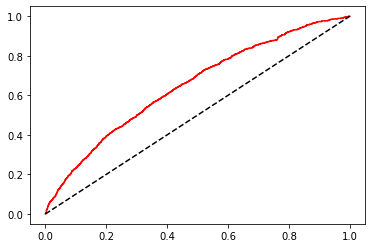

In [97]:
fpr,tpr,thersholds=roc_curve(y_test,prob)
plt.plot(fpr,tpr,color="red",label="logistic regression")
plt.xlabel=('false positive rate or [1-true negative rate]')
plt.ylabel=('true positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show

# Model Creation: Random Forest Classifier

In [34]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [35]:
y_pred = model.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred)

array([[5495,  349],
       [1110,  538]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.8052589428723972

In [38]:
pd.Series(y_pred).value_counts()

0    6605
1     887
dtype: int64

In [39]:
data = pd.DataFrame({"actual":y_test,"predicted":y_pred})
data

,actual,predicted
7544,0,0
17388,0,0
5124,0,0
23469,0,0
22187,0,0
...,...,...
29133,0,0
7239,1,0
24164,0,0
10139,0,0


# Decision Tree Classifier using Entropy Criteria

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

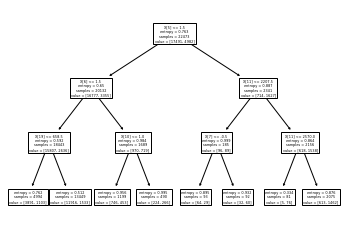

In [41]:
#PLot the decision tree
plot_tree(model)
plt.show()

In [42]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70618358, 0.18028953, 0.00560607, 0.        , 0.        ,
       0.00985636, 0.01718032, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08088415,
       0.        , 0.        , 0.        ])

In [43]:
pred = model.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
pd.Series(pred).value_counts()

0    6577
1     915
dtype: int64

In [45]:
confusion_matrix(y_test,pred)

array([[5538,  306],
       [1039,  609]], dtype=int64)

In [46]:
y_test

7544     0
17388    0
5124     0
23469    0
22187    0
        ..
29133    0
7239     1
24164    0
10139    0
19963    0
Name: default.payment.next.month, Length: 7492, dtype: int32

In [47]:
accuracy_score(y_test,pred)

0.8204751735184197

# Model Creation: XGBClassifier

In [48]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
y_pred = model.predict(X_test)


In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
accuracy_score(y_test,y_pred)

0.8183395621996796

In [52]:
confusion_matrix(y_test,y_pred)

array([[5518,  326],
       [1035,  613]], dtype=int64)

# Model Creation:Light GBM

In [54]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label = y_train)
d_train


In [55]:
params = {}
params['learning_rate'] = 0.002    #,0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [56]:
params

{'learning_rate': 0.002,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 50,
 'max_depth': 10}

In [57]:
clf = lgb.train(params, d_train, 1400)

[LightGBM] [Info] Number of positive: 4982, number of negative: 17491
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 22473, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221688 -> initscore=-1.255855
[LightGBM] [Info] Start training from score -1.255855


In [58]:
#Prediction
y_pred=clf.predict(X_test)
y_pred

array([0.08739528, 0.15572594, 0.50460225, ..., 0.28375419, 0.13045099,
       0.07829091])

In [59]:
predictions = [round(value) for value in y_pred]
predictions

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [60]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8206086492258409